In [2]:
import numpy as np 
from matplotlib import pyplot as plt 
import scipy.io as sio

from utils import *
from generateData import generateSynthData
from src.data import datagen as dg

In [26]:
data_gen = dg.Dataset(n_nodes=100, 
                      expected_density=1.5,
                      n_samples=5000,
                      n_experiments=5,
                      min_targets=25,
                      max_targets=25,
                      mode='no-constraint')
datasets = data_gen.generate()
intervention_sets = data_gen.targets

In [27]:
observed_set = np.setdiff1d(np.arange(100), intervention_sets[0])
U = np.zeros((100, 100))
U[observed_set, observed_set] = 1

W = data_gen.gen_model.weights
Cov_X = np.linalg.inv(np.eye(100) - U@W.T) @ np.linalg.inv(np.eye(100) - U@W.T).T

In [5]:
(np.abs(Cov_X) > 0).sum()

2880

In [6]:
intervention_sets[0]

array([30, 65, 56, 80, 68,  1, 82, 97, 42, 15, 62, 57, 83,  6, 86, 49, 52,
       45, 98, 96, 43,  5, 37, 13, 22])

In [7]:
n = 100
nSamples = 5000

M = 1
synthetic_data = generateSynthData(d_list=[n], p=0.07, M=M, N=nSamples, dim_percent=0.8)

Number of Nodes: 100
Generating adj. matrices


100%|██████████| 1/1 [00:00<00:00, 55.51it/s]


Sampling direct observations


100%|██████████| 1/1 [00:00<00:00, 20.00it/s]


Constructing the measurement matrix
changed scale
Generating the indirect measurements


100%|██████████| 1/1 [00:00<00:00, 99.81it/s]


Sensing matrix shape: (37, 100)


Text(0.5, 1.0, 'Baseline Sensing Matrix')

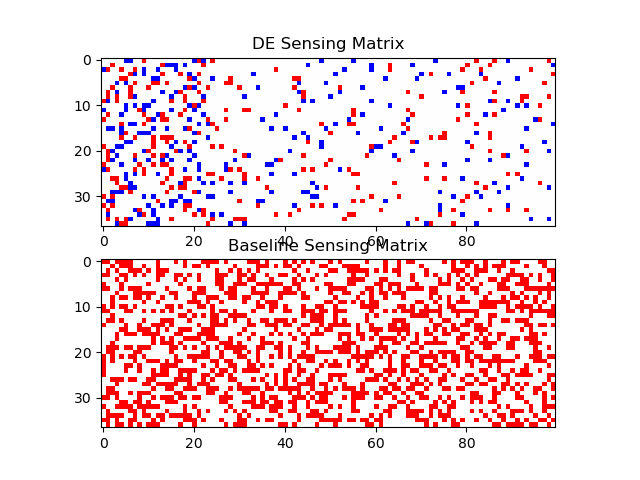

In [20]:
lambda_h = sio.loadmat("lambda_h.mat")['lambda_h']
lambda_l = sio.loadmat("lambda_l.mat")["lambda_l"]

A = getSensingMatrixUP(lambda_h, lambda_l, dch=7, dcl=7, nh=25, nl=75, A=1.0)
A_bs = generateA(A.shape[0], A.shape[1], delta=15)
print("Sensing matrix shape: {}".format(A.shape))

%matplotlib widget

fig, axs = plt.subplots(2, 1)

im = axs[0].imshow(A, cmap='bwr', vmin=-1, vmax=1)
axs[0].set_title("DE Sensing Matrix")
im = axs[1].imshow(A_bs, cmap='bwr', vmin=-1, vmax=1)
axs[1].set_title("Baseline Sensing Matrix")
# cbar = plt.colorbar(im)

In [21]:
nl = 75
nh = 25

X = synthetic_data[n]['X'][0]
W = synthetic_data[n]['W'][0]

Cov_X = np.linalg.inv(np.eye(n) - W.T) @ np.linalg.inv(np.eye(n) - W.T).T 

In [22]:
(np.abs(Cov_X[nh:,nh:]) > 0).sum()

813

In [23]:
Cov_X_hh = Cov_X[:nh, :nh]

Y = X @ A.T
Y_bs = X @ A_bs.T

S_y = (1/nSamples) * Y.T @ Y 
Cov_X_hat_de = covarianceEstimate(S_y, A, pen_coeff=0.5, noise=True)
Cov_x_hat_de_hh = Cov_X_hat_de[:nh, :nh]

S_y_bs = (1/nSamples) * Y_bs.T @ Y_bs 
Cov_x_hat_bs = covarianceEstimate(S_y_bs, A_bs, pen_coeff=0.5, noise=True)
Cov_x_hat_bs_hh = Cov_x_hat_bs[:nh, :nh]

In [24]:
Cov_X_hh = Cov_X[:nh, :nh]
Cov_x_hat_de_hh = Cov_X_hat_de[:nh, :nh]
Cov_x_hat_bs_hh = Cov_x_hat_bs[:nh, :nh]

In [25]:
print("DE Error, Fro: {}, MAE: {}".format(np.linalg.norm(Cov_X_hh - Cov_x_hat_de_hh, 'fro'), np.abs(Cov_X_hh - Cov_x_hat_de_hh).max()))
print("BS Error, Fro: {}, MAE: {}".format(np.linalg.norm(Cov_X_hh - Cov_x_hat_bs_hh, 'fro'), np.abs(Cov_X_hh - Cov_x_hat_bs_hh).max()))

DE Error, Fro: 4.041715391759071, MAE: 0.6250089783860845
BS Error, Fro: 3.862653430644358, MAE: 0.6250127788249846


In [16]:
S_x = (1/nSamples) * X.T @ X 
S_x_hh = S_x[:nh, :nh]

print(np.linalg.norm(Cov_X_hh - S_x_hh, 'fro'))

0.7967294532978965
